In [1]:
import math
import random as rnd
from numpy import array_equal


class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()
        stuck = 0
        while True:
            # Obtain best neighbor state from current one
            neighbor = problem.bestNeighbor(current)
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a maximum (local or global) or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # problem.printState(current)
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem, iterations=25):
        bestSolution = SearchAlgorithms.stochasticHillClimbing(problem)
        bestValue = problem.stateValue(bestSolution)
        for i in range(iterations):
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)

            # If solution is better than the best one
            solutionValue = problem.stateValue(solution)
            if solutionValue > bestValue:
                bestSolution = solution.copy()
                bestValue = solutionValue

        # Return best solution state after iterations
        problem.printState(bestSolution, 'Hill climbing')
        return bestSolution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0
        while True:
            T = schedule(t)
            t += 1

            if T <= 0:
                problem.printState(current, 'Simulated annealing')
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current)

            # print(deltaE, math.exp(deltaE/T), T)
            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()

    def schedule(time):
        T0 = 100
        alpha = 0.99
        return T0 * alpha ** time


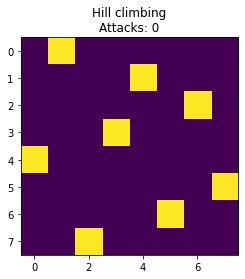

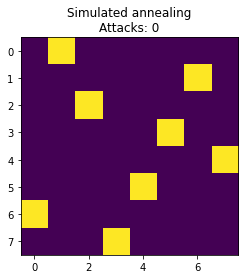

[2, 7, 3, 6, 8, 5, 1, 4]

In [2]:
from NQueens import NQueens
nq = NQueens(8)
SearchAlgorithms.hillClimbingWithRandomRestart(nq)
SearchAlgorithms.simulatedAnnealing(nq, SearchAlgorithms.schedule)


[(63, 46), (12, 71), (39, 48), (91, 77), (56, 44), (69, 97), (91, 19), (27, 13), (19, 87), (52, 37), (80, 11), (1, 17), (18, 29), (19, 84), (46, 4), (73, 92), (12, 90), (48, 59), (31, 77), (7, 54)]


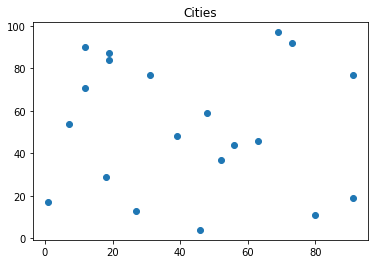

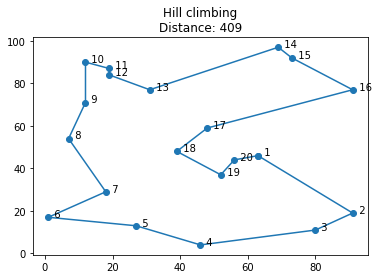

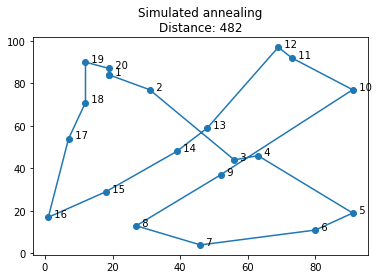

[(19, 84),
 (31, 77),
 (56, 44),
 (63, 46),
 (91, 19),
 (80, 11),
 (46, 4),
 (27, 13),
 (52, 37),
 (91, 77),
 (73, 92),
 (69, 97),
 (48, 59),
 (39, 48),
 (18, 29),
 (1, 17),
 (7, 54),
 (12, 71),
 (12, 90),
 (19, 87),
 (19, 84)]

In [3]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(20)
SearchAlgorithms.hillClimbingWithRandomRestart(ts)
SearchAlgorithms.simulatedAnnealing(ts, SearchAlgorithms.schedule)
